In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [7]:
t = Symbol('t')
x = Sin(t) - t * Cos(t)
y = Cos(t) + t * Sin(t)

dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, simplify(dy2_xx))

cos(t)/sin(t)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [39]:
t = Symbol('t')
x = t ** 2 - 2 * t
y = t ** 2 + 2 * t

dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3

dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)

dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [60]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
points = list(crit_points)
display(points)
print()

max_arr = []
min_arr = []
for i, item in enumerate(points):
    if item in dy_x_num_nul:
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
            max_arr.append(item)
display('максимум', max_arr)
print()
display('минимум', min_arr)
print()

dy2_xx_points = Union(dy2_xx_num_nul, dy2_xx_den_nul)
dy2_xx_points = list(dy2_xx_points)
display(dy2_xx_points)
print()

inflection = []
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right < 0:
            inflection.append(item)
display('перегиб ', inflection)

[-1, 1]

'максимум'

[]

'минимум'

[]

[1]

'перегиб '

[]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [104]:
t = Symbol('t')
x = sympy.E ** t
y = t * 2 ** (sympy.E * t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3

# НЕ ПОЛУЧАЕТСЯ ПРЕОБРАЗОВАТЬ В ЛИСТ
# ИСПОЛЬЗОВАЛ WOLFRAM И ВБИЛ ВРУЧНУЮ
# display(solveset(dy2_xx))
# dy2_xx_points = list(solveset(dy2_xx))
# display(dy2_xx_points)
dy2_xx_points = [(1 - sympy.E*sympy.log(4))/(sympy.E*sympy.log(2)*(sympy.E*sympy.log(2) - 1))]
dy2_xx_points = [-1.66174]
points = dy2_xx_points + [0]

inflection = []
for i, item in enumerate(dy2_xx_points):
    df_left = dy2_xx.subs(t, points[i])
    df_right = dy2_xx.subs(t, points[i + 1])
    if df_left * df_right < 0:
        inflection.append(item)
display('перегиб', inflection)

'перегиб'

[]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

Вариант 36

$x = \frac{2 t}{t^{3} + 8}$

$y = \frac{6 t^{2}}{t^{3} + 8}$

't -> -2'

-oo

oo

-------------------------


't -> +oo'

0

0

-------------------------


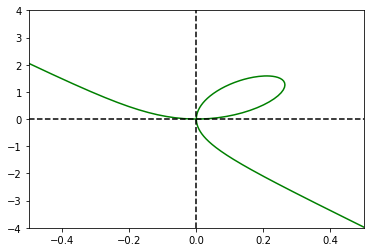

In [184]:
t = Symbol('t')
x = (2 * t)/(t**3+8)
y = (6 * t**2)/(t**3+8)
display('t -> -2', limit(x, t, -2), limit(y, t, -2))
print("-------------------------")
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))
print("-------------------------")

T1 = np.linspace(-1.99, 100, 1000)
T2 = np.linspace(-100, -2.01, 1000)
for T in [T1, T2]:
    plt.plot((2 * T)/(T**3+8), (6 * T**2)/(T**3+8), color='green')

# y = kx + b where k = 0 and b = 0
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlim(-0.5, 0.5)
plt.ylim(-4, 4)
plt.show()